In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Ileum_Ileum_HCLAdultIleum2"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/db_v1/Ileum_Ileum_HCLAdultIleum2/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tsv.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


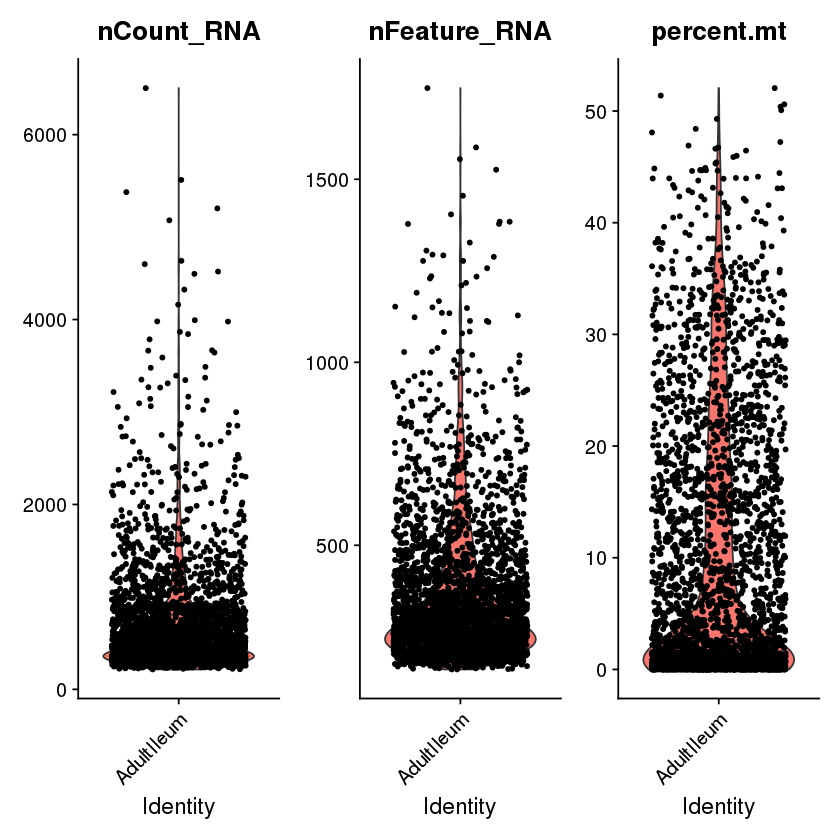

In [7]:
# Pre-processing
min.cells = 50
min.features = 200
nFeature_RNA_range = c(min.features, 600)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [5]:
percent.mt.thre = 40
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [8]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 5198 by 3132

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3132 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“产生了NaNs”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning mess

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 2 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 5198 genes



  |======================================================================| 100%


Computing corrected count matrix for 5198 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.880721 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  DCN, MGP, LUM, IFITM3, COL1A2, SPARCL1, CLU, EFEMP1, SERPING1, C1R 
	   SPARC, IFI27, S100A13, C1S, MFAP5, C3, S100A6, MFAP4, ADH1B, IGFBP6 
	   GNG11, OGN, S100A10, COL3A1, FN1, DPT, PLAC9, IFITM1, CCDC80, SFRP2 
Negative:  CXCL8, GPR183, HLA-DRA, FCER1G, SAT1, AIF1, BCL2A1, LYZ, TYROBP, SRGN 
	   IL1B, CXCL3, MS4A6A, CCL3, CXCL2, CCL3L3, HLA-DPB1, HLA-DPA1, CTSS, RGS1 
	   FTH1, SOD2, HLA-DQA1, FTL, LST1, CD74, C1QB, NAMPT, HLA-DRB1, PLEK 
PC_ 2 
Positive:  ACKR1, SPARCL1, A2M, PECAM1, PCAT19, IGFBP7, GNG11, VWF, IFITM1, EMCN 
	   TSPAN7, TGFBR2, AQP1, IFITM3, FABP5, ECSCR, CD74, IFI27, PLVAP, LIFR 
	   PLAT, RNASE1, KCTD12, CCL23, IL33, GIMAP7, CAV1, ITM2B, JAM2, HLA-E 
Negative:  DCN, LUM, MGP, COL1A2, S100A6, LGALS1, MFAP5, EFEMP1, MFAP4, IGFBP6 
	   C1S, C3, ADH1B, S100A4, DPT, COL3A1, SSR4, CFD, OGN, C1R 
	   SFRP2, JCHAIN, C1QTNF3, CTSK, SERPINF1, PLAC9, COL1A1, CCDC80, PLA2G2A, MGST1 
PC_ 3 
Positive:  REG1A, RPS18, GPX2, AGR2, RPS14, RPLP1, RPS6, RPS3A, RPS3

png 
  2

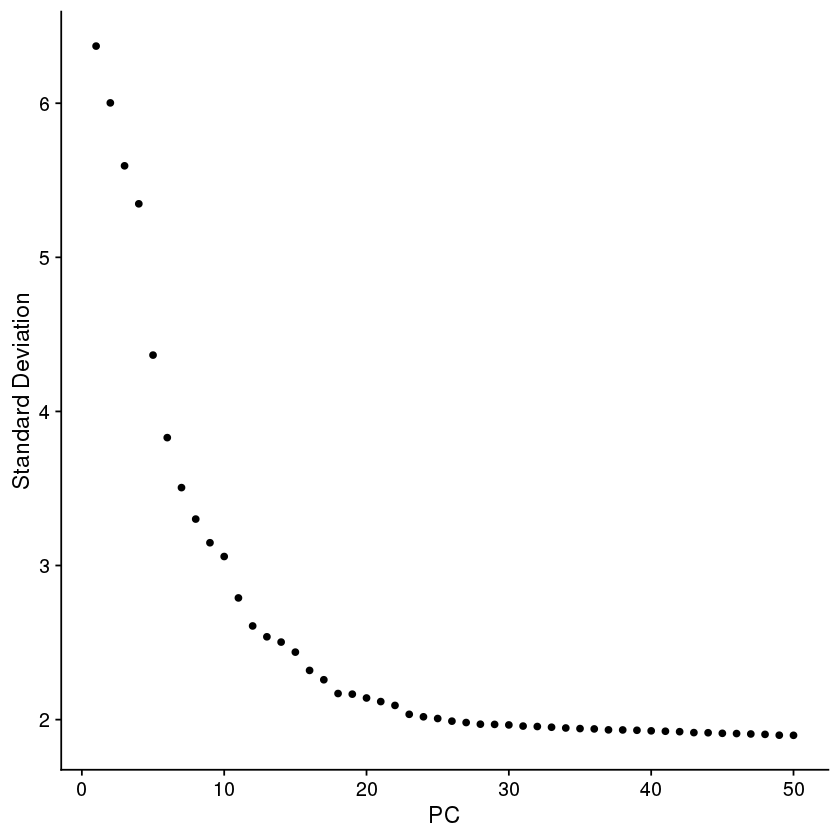

In [9]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [10]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [11]:
dataobj <- FindClusters(dataobj, resolution = 0.6, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3132
Number of edges: 131719

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.9110
Number of communities: 14
Elapsed time: 0 seconds


ARI 
0.7557791

In [12]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:03:15 UMAP embedding parameters a = 0.9922 b = 1.112

12:03:15 Read 3132 rows and found 30 numeric columns

12:03:15 Using Annoy for neighbor search, n_neighbors = 30

12:03:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

12:03:19 Writing NN index file to temp file /tmp/Rtmp7WB9bR/file94924c849ddd

12:03:19 Searching Annoy index using 1 thread, search_k = 3000

12:03:21 Annoy recall = 100%

12:03:21 Commencing smooth kNN distance calibration using 1 thread

12:03:23 Initializing fr

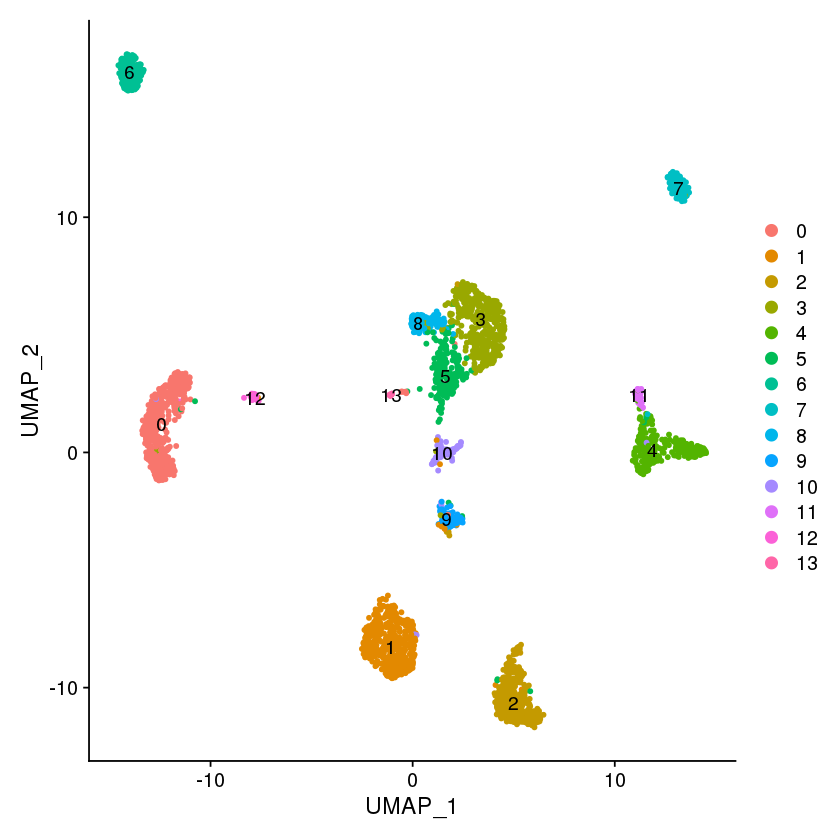

In [13]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

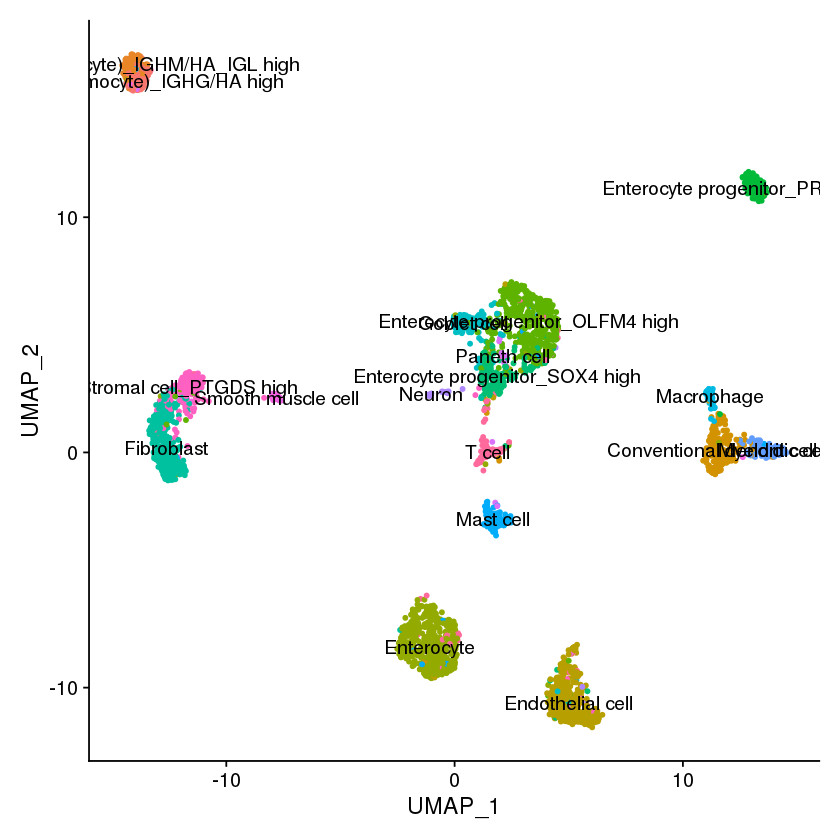

In [14]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [32]:
new.cluster.ids <- c("Ileum-Connective tissue-Fibroblast-LUM",
                     "Ileum-Epithelial tissue-Enterocyte-GUCA2A", 
                       "Ileum-Epithelial tissue-Endothelial cell-SPARCL1",
                     "Ileum-Epithelial tissue-Paneth cell-GPX2",
                     "Ileum-Connective tissue-Dendritic cell-IL1B",
                     "Ileum-Epithelial tissue-Paneth cell-DEFA5",
                     "Ileum-Connective tissue-B cell-JCHAIN", 
                     "Ileum-Epithelial tissue-Enterocyte progenitor-CPB1",
                      "Ileum-Epithelial tissue-Goblet cell-AGR2", 
                     "Ileum-Connective tissue-Mast cell-CPA4",
                      "Ileum-Connective tissue-T cell-TRAC", 
                     "Ileum-Connective tissue-Macrophage-C1QA",
                     "Ileum-Muscle tissue-Smooth muscle cell-MYL9",
                     "Ileum-Nerve tissue-Neuron-BEX2")

In [31]:
subset(dataobj.markers,cluster=='4')
i=i+1
# subset(dataobj.markers,gene=='LYVE1')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
AIF1,0.000000e+00,1.0739659,0.816,0.034,0.000000e+00,4,AIF1
MS4A6A,1.304950e-296,0.8196945,0.636,0.023,6.783131e-293,4,MS4A6A
CXCL8,6.234553e-274,2.5364171,0.866,0.099,3.240721e-270,4,CXCL8
BCL2A1,1.579006e-263,1.3077729,0.696,0.048,8.207675e-260,4,BCL2A1
LST1,5.285991e-259,0.5713295,0.516,0.013,2.747658e-255,4,LST1
IL1B,5.615232e-257,1.4362537,0.544,0.019,2.918797e-253,4,IL1B
FCER1G,2.203785e-249,0.9252025,0.760,0.068,1.145527e-245,4,FCER1G
GPR183,1.056552e-246,1.5591441,0.806,0.091,5.491959e-243,4,GPR183
TYROBP,2.061609e-206,0.6522105,0.583,0.041,1.071624e-202,4,TYROBP


In [33]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [34]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

12:23:48 UMAP embedding parameters a = 0.9922 b = 1.112

12:23:48 Read 3132 rows and found 30 numeric columns

12:23:48 Using Annoy for neighbor search, n_neighbors = 30

12:23:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

12:23:51 Writing NN index file to temp file /tmp/Rtmp7WB9bR/file9492749780d7

12:23:51 Searching Annoy index using 1 thread, search_k = 3000

12:23:53 Annoy recall = 100%

12:23:54 Commencing smooth kNN distance calibration using 1 thread

12:23:56 Initializing from normalized Laplacian + noise

12:23:56 Commencing optimization for 500 epochs, with 133910 positive edges

12:24:28 Optimization finished



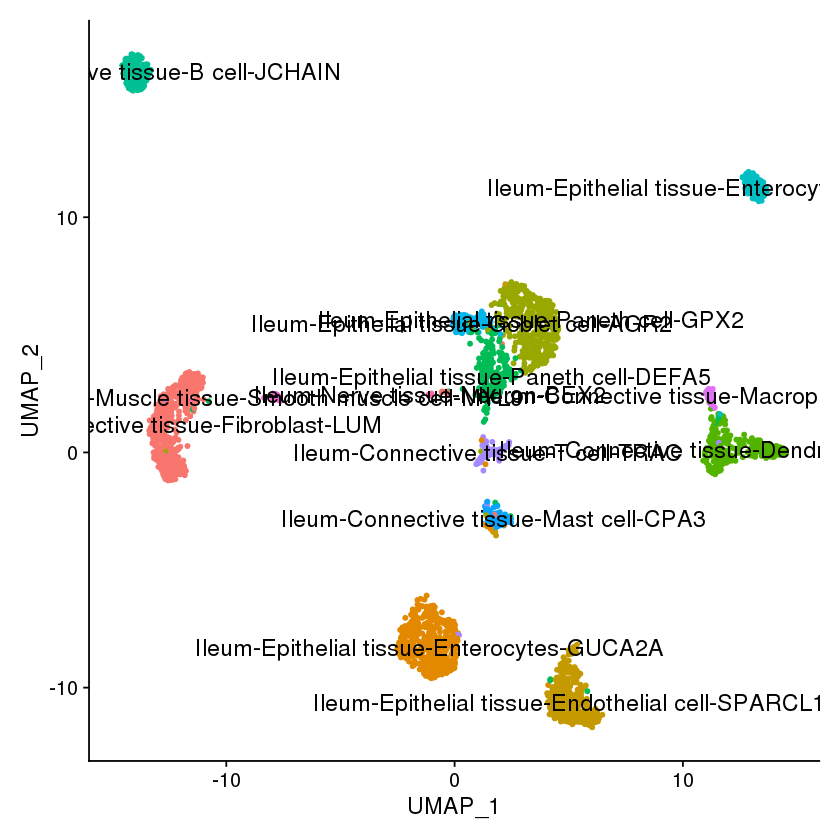

In [35]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [15]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [36]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [3]:
dataobj.dbupload_v1 = readRDS(file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))